# Summary
This analysis explores key characteristics and patterns among best-selling books using the “Bestseller Books” dataset published on Kaggle by Madhulika Kemwal. Following the six-step data analysis process — Ask, Prepare, Process, Analyze, Share, and Act — we aim to uncover insights about what makes a book a bestseller. We will examine factors such as genre, price, user ratings, and reviews to identify trends that may influence a book’s commercial success.
# Ask Phase
The Ask phase defines the purpose and direction of our analysis. With this dataset, we want to better understand the common traits of best-selling books, how various attributes relate to each other, and what factors might predict a book’s popularity and performance.
## Key questions for the analysis
* What are the most common genres among bestsellers?
* Do higher-rated books correlate with higher prices or review counts?
* Are certain authors or publication years more represented in the bestsellers list?
* What characteristics do the top-performing books share?
# Prepare Phase
## About the data
The dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/madhulikakemwal/bestseller-books) and contains information on 550 best-selling books listed on Amazon. It includes 12 columns with details such as book title, author, genre, user rating, price, number of reviews, and year of publication.

Before starting the analysis, the dataset will be evaluated using the ROCCC criteria:
* Reliable: Published on Kaggle by Madhulika Kemwal, a platform widely used for data science competitions and learning.
* Original: The dataset appears to be curated by the author using public data sources.
* Comprehensive: It covers a variety of relevant features (genre, rating, price, reviews, etc.) for analyzing bestselling books.
* Current: The dataset includes books published between 2009 and 2019. While more recent data would be ideal, in this case, recency is not critical. The goal of this analysis is to provide a historical representation of best-selling books during that decade, which remains valuable for identifying long-term trends and patterns.
* Cited: The dataset does not explicitly cite the original source of the bestseller data.
Despite some limitations in citation and update frequency, the dataset offers a rich opportunity to practice exploratory data analysis and extract valuable trends in the publishing industry.
## Data Overview
The dataset contains 550 rows and 12 columns. Below is a summary of the key variables:
| Column Name   | Description                                |
|---------------|--------------------------------------------|
| Name          | Title of the book                          |
| Author        | Author of the book                         |
| User Rating   | Average user rating (scale: 0–5)           |
| Reviews       | Number of user reviews                     |
| Price         | Price of the book in USD                   |
| Year          | Year when the book was a bestseller        |
| Genre         | Fiction or Non Fiction                     |

All columns will be considered for initial exploration, especially User Rating, Reviews, Price, Genre, and Year, as these provide the most direct insight into book performance and popularity
# Process Phase
In this phase, we will clean and preprocess the data to ensure it is analysis-ready. This includes:
* Checking for and handling missing values
* Converting data types (e.g., ensuring Price and Reviews are numeric)
* Removing duplicates, if any
* Standardizing genre and author names
* Encoding categorical variables where appropriate
## Data Inspection
An initial inspection will be performed using Python tools such as pandas.info(), isnull().sum(), and descriptive statistics. This will help us understand the structure of the dataset, identify potential issues, and determine any necessary preprocessing steps.

In [1]:
# Libraries and datasets

import pandas as pd
df = pd.read_csv("/kaggle/input/bestseller-books/bestsellers with categories.csv")

# First few rows

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
# Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


The dataset contains no missing values, and all columns have the correct data types for further analysis.

In [3]:
# Unique values

df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

It is striking that the 'Name' column contains only 351 unique values, despite having 550 rows. This suggests that some books appear multiple times, and a deeper analysis is needed to understand why.

In [4]:
# statistics

df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In general, everything looks normal except for the 'Price' column. The minimum value is 0 and the maximum is 105 — both of which appear to be outliers. For this reason, a deeper analysis is required to determine whether these values are valid or need to be addressed."

## Data cleaning process
The data cleaning process was straightforward, focusing primarily on detecting duplicate entries and price outliers. Since there were no missing values and all columns had the correct data types, only minimal intervention was needed. A deeper look was taken into the 'Name' column due to repeated book titles, likely caused by multiple appearances across different years. Additionally, the 'Price' column presented unusual values — a minimum of 0 and a maximum of 105 — which required further analysis to assess their validity.
### Unusual values
The 'Price' column shows some unusual values, with a minimum of 0 and a maximum of 105. These extremes may reflect special promotions, data entry errors, or unique editions with significantly different pricing. Further analysis is needed to determine whether these outliers should be excluded or treated differently during the analysis. First, we will inspect the highest and lowest values in the 'Price' column.

In [5]:
# Max values

print(df.drop_duplicates(subset='Name').sort_values(by='Price', ascending=False)[['Name', 'Price']].head(25))

                                                  Name  Price
69   Diagnostic and Statistical Manual of Mental Di...    105
473                       The Twilight Saga Collection     82
151                           Hamilton: The Revolution     54
346  The Book of Basketball: The NBA According to T...     53
159         Harry Potter Paperback Box Set (Books 1-7)     52
271  Publication Manual of the American Psychologic...     46
524                                           Watchmen     42
439                       The Official SAT Study Guide     40
338                                      The Alchemist     39
444  The Official SAT Study Guide, 2016 Edition (Of...     36
12                             A Stolen Life: A Memoir     32
108  Fifty Shades Trilogy (Fifty Shades of Grey / F...     32
6    A Game of Thrones / A Clash of Kings / A Storm...     30
153  Harry Potter and the Chamber of Secrets: The I...     30
156  Harry Potter and the Prisoner of Azkaban: The ...     30
410     

Following a quick online review, it was determined that, while some books exhibit high prices, these values are coherent with publicly available pricing information.

In [6]:
# Min values

print(df.drop_duplicates(subset='Name').sort_values(by='Price', ascending = True)[['Name', 'Price']].head(25))

                                                  Name  Price
116                        Frozen (Little Golden Book)      0
358              The Constitution of the United States      0
42          Cabin Fever (Diary of a Wimpy Kid, Book 6)      0
505                              To Kill a Mockingbird      0
219                                  Little Blue Truck      0
193                               JOURNEY TO THE ICE P      0
71             Diary of a Wimpy Kid: Hard Luck, Book 8      0
381                                        The Getaway      0
461  The Short Second Life of Bree Tanner: An Eclip...      0
91   Eat This Not That! Supermarket Survival Guide:...      1
388  The Girl with the Dragon Tattoo (Millennium Se...      2
103                     Fear: Trump in the White House      2
11   A Patriot's History of the United States: From...      2
264  Percy Jackson and the Olympians Paperback Boxe...      2
8        A Higher Loyalty: Truth, Lies, and Leadership      3
43   Cal

In this case, the prices of some books appear unusual, since bestsellers are generally not sold at such low prices. However, it is not implausible that these low prices correspond to special editions, promotions, or economical digital formats.

Since there are no official price records, we will rely on the dataset information. Nevertheless, the following table lists the titles with potentially inconsistent prices (possible special editions or errors):

| Name                                          | Price |
|------------------------------------------------|-------|
| Frozen (Little Golden Book)                     | 0     |
| Cabin Fever (Diary of a Wimpy Kid, Book 6)     | 0     |
| To Kill a Mockingbird                           | 0     |
| Little Blue Truck                               | 0     |
| JOURNEY TO THE ICE P                            | 0     |
| Diary of a Wimpy Kid: Hard Luck, Book 8        | 0     |
| The Getaway                                    | 0     |
| The Short Second Life of Bree Tanner            | 0     |


### Unique values
The 'Name' column has 351 unique values out of 550 entries, suggesting repeated book titles. This could be due to books appearing as bestsellers in multiple years, different editions (e.g., hardcover vs. paperback), or slight variations in how the titles were recorded (e.g., punctuation or spacing differences). A deeper inspection is needed to confirm the cause of these repetitions.

In [7]:
# A fast view of the rows with repeated values in the 'Name' column.

print(df[df.duplicated(subset = 'Name', keep = False)])

                                                  Name           Author  \
9                            A Man Called Ove: A Novel  Fredrik Backman   
10                           A Man Called Ove: A Novel  Fredrik Backman   
20                         All the Light We Cannot See    Anthony Doerr   
21                         All the Light We Cannot See    Anthony Doerr   
32                                            Becoming   Michelle Obama   
..                                                 ...              ...   
544                                             Wonder    R. J. Palacio   
546  You Are a Badass: How to Stop Doubting Your Gr...      Jen Sincero   
547  You Are a Badass: How to Stop Doubting Your Gr...      Jen Sincero   
548  You Are a Badass: How to Stop Doubting Your Gr...      Jen Sincero   
549  You Are a Badass: How to Stop Doubting Your Gr...      Jen Sincero   

     User Rating  Reviews  Price  Year        Genre  
9            4.6    23848      8  2016      F

In [8]:
# Reapeated rows

print(df.duplicated(keep = False).sum())

0


After analyzing the data, we can conclude that the repeated entries in the "Name" column occur because some books were bestsellers for multiple years—for example, "A Man Called Ove: A Novel" was a bestseller in both 2016 and 2017. However, keeping these repeated rows could complicate the analysis, so I plan to remove duplicates. Before doing so, I will examine whether the bestseller years for each book are consecutive or not. For now, I will focus on grouping the data accordingly.

In [9]:
# Function that identifies whether years are consecutive

def are_years_consecutive(years):
    years_sorted = sorted(years)
    return all ((y2 - y1) == 1 for y1, y2 in zip (years_sorted, years_sorted[1:]))

# Show the output of the function

print(df.groupby('Name')['Year'].apply(lambda x: are_years_consecutive(x.unique())).value_counts())

Year
True     342
False      9
Name: count, dtype: int64


We will also verify that all data remains consistent, except for the years, in entries with repeated names to avoid potential errors.

In [10]:
# Repeated "Name" column

print(df['Name'].duplicated(keep=False).sum())

# Repeated rows excluding the 'Year' column

print(df.drop('Year', axis=1).duplicated(keep=False).sum())

# Repeated rows excluding the 'Price' column

print(df.drop('Price', axis=1).duplicated(keep=False).sum())

# Repeated rows excluding the 'Price' and 'Year' columns

print(df.drop(['Year', 'Price'], axis=1).duplicated(keep=False).sum())

295
284
6
295


We can observe that there is variation not only in the publication year of some books but also in their price. This occurs in approximately 6 cases, which are detailed below:

In [11]:
# Books with diferent price

print(df.loc[df['Name'].isin(df.groupby('Name')['Price'].nunique()[lambda x: x > 1].index), ['Name', 'Price']].sort_values(['Name', 'Price']))

                                                  Name  Price
137                                          Gone Girl      9
135                                          Gone Girl     10
136                                          Gone Girl     10
283  Quiet: The Power of Introverts in a World That...      7
282  Quiet: The Power of Introverts in a World That...     20
335  The 7 Habits of Highly Effective People: Power...     16
336  The 7 Habits of Highly Effective People: Power...     16
337  The 7 Habits of Highly Effective People: Power...     16
331  The 7 Habits of Highly Effective People: Power...     24
332  The 7 Habits of Highly Effective People: Power...     24
333  The 7 Habits of Highly Effective People: Power...     24
334  The 7 Habits of Highly Effective People: Power...     24
367                             The Fault in Our Stars      7
365                             The Fault in Our Stars     13
366                             The Fault in Our Stars     13
368     

In this case, we will work with a secondary auxiliary table called df2, which will calculate the average price per book. The 'Year' column will be removed and replaced by a new column 'Years' that lists all the years the book was a bestseller. Finally, a new column will be added to count the number of years each book remained a bestseller.

In [12]:
# Create df2

df2 = (
    df
    .groupby('Name')
    .agg(
        Author=('Author', 'first'),             # Take the first author
        User_Rating=('User Rating', 'mean'),    # Average user rating
        Reviews=('Reviews', 'mean'),            # Average number of reviews
        Genre=('Genre', 'first'),               # Take the first genre (assumed consistent)
        Avg_Price=('Price', 'mean'),            # Average price
        Years=('Year', lambda x: sorted(x.unique())),  # List of unique years sorted
        Count_Years=('Year', 'nunique')         # Count of years as bestseller
    )
    .reset_index()
)


# show df2

df2.head(20)

,Name,Author,User_Rating,Reviews,Genre,Avg_Price,Years,Count_Years
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,Non Fiction,8.0,[2016],1
1,11/22/63: A Novel,Stephen King,4.6,2052.0,Fiction,22.0,[2011],1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,Non Fiction,15.0,[2018],1
3,1984 (Signet Classics),George Orwell,4.7,21424.0,Fiction,6.0,[2017],1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665.0,Non Fiction,12.0,[2019],1
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643.0,Fiction,11.0,[2011],1
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735.0,Fiction,30.0,[2014],1
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699.0,Fiction,15.0,[2017],1
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983.0,Non Fiction,3.0,[2018],1
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848.0,Fiction,8.0,"[2016, 2017]",2


## Conclusions from data cleaning
Before conducting any in-depth analysis, it was essential to ensure that the dataset was clean, consistent, and reliable. Below are the main conclusions from the data cleaning process:

**1. No Missing Values and Correct Data Types:** The dataset contains no missing values, and all columns have the appropriate data types for further analysis. This allowed for a smooth preparation phase without the need for imputation or data type conversion.

**2. Suspicious Price Values:** In general, the dataset appears consistent, except for the 'Price' column. It includes a minimum value of 0 and a maximum of 105 — both of which appear to be outliers. This prompted a deeper investigation to determine the validity of these values.

**3. Outlier Investigation and Interpretation:** The extreme values in the 'Price' column may be explained by special editions, promotional pricing, or potential data entry errors. A manual inspection of the top and bottom prices was conducted. After a quick online review, the higher prices were found to be coherent with publicly available data. On the other hand, unusually low prices, particularly those listed as $0, were less typical for bestsellers. However, such prices are not implausible and may correspond to special editions, heavily discounted versions, or economical digital formats.
Since there are no official records confirming exact prices for each year, we decided to trust the dataset. Still, a list was created to flag titles with potentially inconsistent pricing, which may represent special editions or anomalies.

**4. Duplicate Titles with Variations in Year and Price:** Several issues arose from duplicate book titles that appeared across different years and, in some cases, with different prices. While the price variation affected only a few titles and was resolved by taking the average price, the differences in publication year were more complex. Many books appeared as bestsellers in multiple years, which could potentially affect later analyses. However, aggregating them into a single record could also lead to loss of valuable temporal information. To balance these concerns, we decided to work with two datasets: the original dataset, preserving the full yearly records, and a second grouped version (df2) that includes the average price, a list of all bestseller years for each book, and a count of how many times each title appeared on the list. This approach allows for flexibility depending on the specific analysis while maintaining both accuracy and clarity.
# Analyze
With the dataset cleaned and properly structured, we can now proceed with the analysis phase. The goal is to explore patterns, trends, and relationships within the data to gain meaningful insights about the most successful books, their characteristics, and how certain factors—such as genre, user rating, and publication year—may influence a book’s popularity.

In [13]:
# About the reviews

print("Books with most reviews")
print(df2.groupby('Name')['Reviews'].sum().sort_values(ascending=False).head(25))

Books with most reviews
Name
Where the Crawdads Sing                                                                     87841.0
The Girl on the Train                                                                       79446.0
Becoming                                                                                    61133.0
Gone Girl                                                                                   57271.0
The Fault in Our Stars                                                                      50482.0
The Nightingale: A Novel                                                                    49288.0
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    47265.0
The Martian                                                                                 39459.0
All the Light We Cannot See                                                                 36348.0
The Alchemist                                                          

In [14]:
print("Books with least reviews")
print(df2.groupby('Name')['Reviews'].sum().sort_values(ascending=True).head(25))

Books with least reviews
Name
Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All…       37.0
Soul Healing Miracles: Ancient and New Sacred Wisdom, Knowledge, and Practical Techniques for Healing the Spiritual…     220.0
George Washington's Sacred Fire                                                                                          408.0
True Compass: A Memoir                                                                                                   438.0
The Daily Show with Jon Stewart Presents Earth (The Book): A Visitor's Guide to the Human Race                           440.0
A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror                           460.0
Broke: The Plan to Restore Our Trust, Truth and Treasure                                                                 471.0
Autobiography of Mark Twain, Vol. 1                                              

In [15]:
print("Authors with most reviews")
print(df2.groupby('Author')['Reviews'].sum().sort_values(ascending=False).head(25))

Authors with most reviews
Author
E L James              130746.0
Suzanne Collins        130548.0
Delia Owens             87841.0
Paula Hawkins           79446.0
J.K. Rowling            70535.0
Jeff Kinney             67482.0
Michelle Obama          61133.0
John Grisham            60961.0
John Green              58973.0
Dan Brown               57302.0
Gillian Flynn           57271.0
Bill O'Reilly           54445.0
Veronica Roth           51092.0
Kristin Hannah          49288.0
Dav Pilkey              44261.0
Stephenie Meyer         44058.0
Harper Lee              41216.0
Rick Riordan            39541.0
Andy Weir               39459.0
Anthony Doerr           36348.0
Paulo Coelho            35799.0
Donna Tartt             33844.0
Stieg Larsson           32808.0
George R. R. Martin     32378.0
Craig Smith             30183.0
Name: Reviews, dtype: float64


In [16]:
print("Authors with least reviews")
print(df2.groupby('Author')['Reviews'].sum().sort_values(ascending=True).head(25))

Authors with least reviews
Author
Zhi Gang Sha          257.0
Peter A. Lillback     408.0
Edward M. Kennedy     438.0
Jon Stewart           440.0
Larry Schweikart      460.0
Mark Twain            491.0
Doug Lemov            637.0
Bill Simmons          858.0
F. A. Hayek          1204.0
John Heilemann       1215.0
Justin Halpern       1265.0
Geneen Roth          1302.0
Brené Brown         1329.0
Chris Cleave         1467.0
Francis Chan         1542.0
Michael Pollan       1555.0
Steven D. Levitt     1583.0
Sarah Palin          1636.0
Rob Bell             1649.0
Tony Hsieh           1651.0
Stephen Kendrick     1655.0
David Zinczenko      1676.0
W. Cleon Skousen     1680.0
Mark Hyman M.D.      1789.0
Muriel Barbery       1859.0
Name: Reviews, dtype: float64


In [17]:
print("Total reviews by Genre")
print(df2.groupby('Genre')['Reviews'].sum().sort_values(ascending=False))

Total reviews by Genre
Genre
Fiction        2.097771e+06
Non Fiction    1.339947e+06
Name: Reviews, dtype: float64


In [18]:
print("Average reviews per Author")
print(df2.groupby('Author')['Reviews'].mean().sort_values(ascending=False).head(25))

Average reviews per Author
Author
Delia Owens           87841.0
Paula Hawkins         79446.0
Michelle Obama        61133.0
Gillian Flynn         57271.0
Kristin Hannah        49288.0
Andy Weir             39459.0
Anthony Doerr         36348.0
Paulo Coelho          35799.0
Donna Tartt           33844.0
Craig Smith           30183.0
Laura Hillenbrand     29673.0
John Green            29486.5
Margaret Atwood       29442.0
Tara Westover         28729.0
Alex Michaelides      27536.0
Mark Manson           26490.0
E L James             26149.2
Suzanne Collins       26109.6
Celeste Ng            25706.0
Dale Carnegie         25001.0
Fredrik Backman       23848.0
Daniel James Brown    23358.0
Don Miguel Ruiz       23308.0
Markus Zusak          23148.0
School Zone           23047.0
Name: Reviews, dtype: float64


In [19]:
print("Authors with lowest average reviews")
print(df2.groupby('Author')['Reviews'].mean().sort_values(ascending=True).head(25))

Authors with lowest average reviews
Author
Zhi Gang Sha          128.5
Peter A. Lillback     408.0
Edward M. Kennedy     438.0
Jon Stewart           440.0
Larry Schweikart      460.0
Mark Twain            491.0
Doug Lemov            637.0
David Zinczenko       838.0
Bill Simmons          858.0
Glenn Beck            878.0
The College Board    1004.0
Ina Garten           1099.0
F. A. Hayek          1204.0
John Heilemann       1215.0
Justin Halpern       1265.0
Geneen Roth          1302.0
Brené Brown         1329.0
Chris Cleave         1467.0
Francis Chan         1542.0
Michael Pollan       1555.0
Steven D. Levitt     1583.0
Charlaine Harris     1633.0
Sarah Palin          1636.0
Rob Bell             1649.0
Tony Hsieh           1651.0
Name: Reviews, dtype: float64


In [20]:
print("Total reviews by Year")
print(df.groupby('Year')['Reviews'].sum().sort_values(ascending=False))

Total reviews by Year
Year
2019    794917
2014    792997
2015    711669
2016    709800
2018    696521
2013    654907
2012    654546
2017    644420
2011    405041
2010    273981
2009    235506
Name: Reviews, dtype: int64


In [21]:
# User Rating

print("Books with most user rating")
print(df2.groupby('Name')['User_Rating'].sum().sort_values(ascending=False).head(25))

Books with most user rating
Name
Hamilton: The Revolution                                                                                                   4.9
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2)                                  4.9
Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)                                      4.9
Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)                                   4.9
Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)                                    4.9
Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)                                    4.9
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)                                            4.9
Brown Bear, Brown Bear, What Do You See?                                      

In [22]:
print("Books with least user rating")
print(df2.groupby('Name')['User_Rating'].sum().sort_values(ascending=True).head(25))

Books with least user rating
Name
The Casual Vacancy                                                                                                  3.3
Go Set a Watchman: A Novel                                                                                          3.6
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)                            3.8
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                                 3.9
Allegiant                                                                                                           3.9
The Elegance of the Hedgehog                                                                                        4.0
StrengthsFinder 2.0                                                                                                 4.0
Gone Girl                                                                                                           4.0
Harry 

In [23]:
print("Authors with highest average user rating")
print(df2.groupby('Author')['User_Rating'].mean().sort_values(ascending=False).head(25))

Authors with highest average user rating
Author
Patrick Thorpe           4.90
Alice Schertle           4.90
Dav Pilkey               4.90
Pete Souza               4.90
Lin-Manuel Miranda       4.90
Rush Limbaugh            4.90
Sarah Young              4.90
Jill Twiss               4.90
Nathan W. Pyle           4.90
Sherri Duskey Rinker     4.90
Chip Gaines              4.90
Eric Carle               4.90
Emily Winfield Martin    4.90
Bill Martin Jr.          4.90
Mark R. Levin            4.85
Brandon Stanton          4.85
J. K. Rowling            4.85
Dr. Seuss                4.80
Crispin Boyer            4.80
Giles Andreae            4.80
Margaret Wise Brown      4.80
School Zone              4.80
Marjorie Sarnat          4.80
Paul Kalanithi           4.80
Daniel James Brown       4.80
Name: User_Rating, dtype: float64


In [24]:
print("Authors with lowest average user rating")
print(df2.groupby('Author')['User_Rating'].mean().sort_values(ascending=True).head(25))

Authors with lowest average user rating
Author
Donna Tartt          3.9
Gillian Flynn        4.0
Muriel Barbery       4.0
Gallup               4.0
Ian K. Smith M.D.    4.1
Pierre Dukan         4.1
Chris Cleave         4.1
Paula Hawkins        4.1
Elizabeth Strout     4.2
Harper Lee           4.2
Dan Brown            4.2
Mark Twain           4.2
Michael Wolff        4.2
Rob Bell             4.2
Mark Hyman M.D.      4.2
Geneen Roth          4.2
Eben Alexander       4.3
Khaled Hosseini      4.3
Laurel Randolph      4.3
Kevin Kwan           4.3
Paula McLain         4.3
Mike Moreno          4.3
Howard Stern         4.3
Margaret Atwood      4.3
Amy Ramos            4.3
Name: User_Rating, dtype: float64


In [25]:
print("Average user rating by Genre")
print(df2.groupby('Genre')['User_Rating'].mean().sort_values(ascending=False))

Average user rating by Genre
Genre
Fiction        4.615625
Non Fiction    4.603366
Name: User_Rating, dtype: float64


In [26]:
print("Average user rating by Year")
print(df.groupby('Year')['User Rating'].mean().sort_values(ascending=False))

Average user rating by Year
Year
2019    4.740
2016    4.678
2018    4.668
2017    4.660
2015    4.648
2014    4.622
2009    4.584
2010    4.558
2011    4.558
2013    4.554
2012    4.532
Name: User Rating, dtype: float64


In [27]:
# Price

print("Average Price by Genre")
print(df2.groupby('Genre')['Avg_Price'].mean().sort_values(ascending=False))

Average Price by Genre
Genre
Non Fiction    13.779083
Fiction        12.123854
Name: Avg_Price, dtype: float64


In [28]:
# Correlation

print("Correlation matrix between Reviews, Average Price, User Rating, and Count of Years as Bestseller")
print(df2[['Reviews', 'Avg_Price', 'Count_Years', 'User_Rating']].corr())

Correlation matrix between Reviews, Average Price, User Rating, and Count of Years as Bestseller
              Reviews  Avg_Price  Count_Years  User_Rating
Reviews      1.000000  -0.033600     0.234864    -0.055691
Avg_Price   -0.033600   1.000000     0.010640    -0.030686
Count_Years  0.234864   0.010640     1.000000     0.047171
User_Rating -0.055691  -0.030686     0.047171     1.000000


## Conclusions of the analysis
After completing the data analysis process, the following conclusions were drawn:
* The books with the highest and lowest number of reviews and user ratings were identified.
* Authors with the highest and lowest total and average reviews and user ratings were found, showing different results when considering totals versus averages.
* The mean, minimum, maximum, and quartiles of the variables Reviews, User Rating, and Price were calculated, providing useful indicators of market behavior.
* Fiction books generally receive more reviews compared to non-fiction.
* There is a clear trend that more recent publication years tend to have higher numbers of reviews.
* There is little difference in user rating averages across different book genres.
* The average user rating per year was analyzed, with 2019 showing the highest average user rating.
* Non-fiction books tend to be slightly less expensive than fiction titles.
* Although it might seem that price, reviews, years as a bestseller, and user rating could be correlated, the data indicates there is no significant correlation between these variables.
# Share
In this section, we will create visualizations to effectively communicate the key insights discovered in the bestseller books dataset. The findings will be shared using both traditional Python-based graphs and interactive dashboards built with Power BI, providing a clear and dynamic way to present the analysis results to stakeholders.

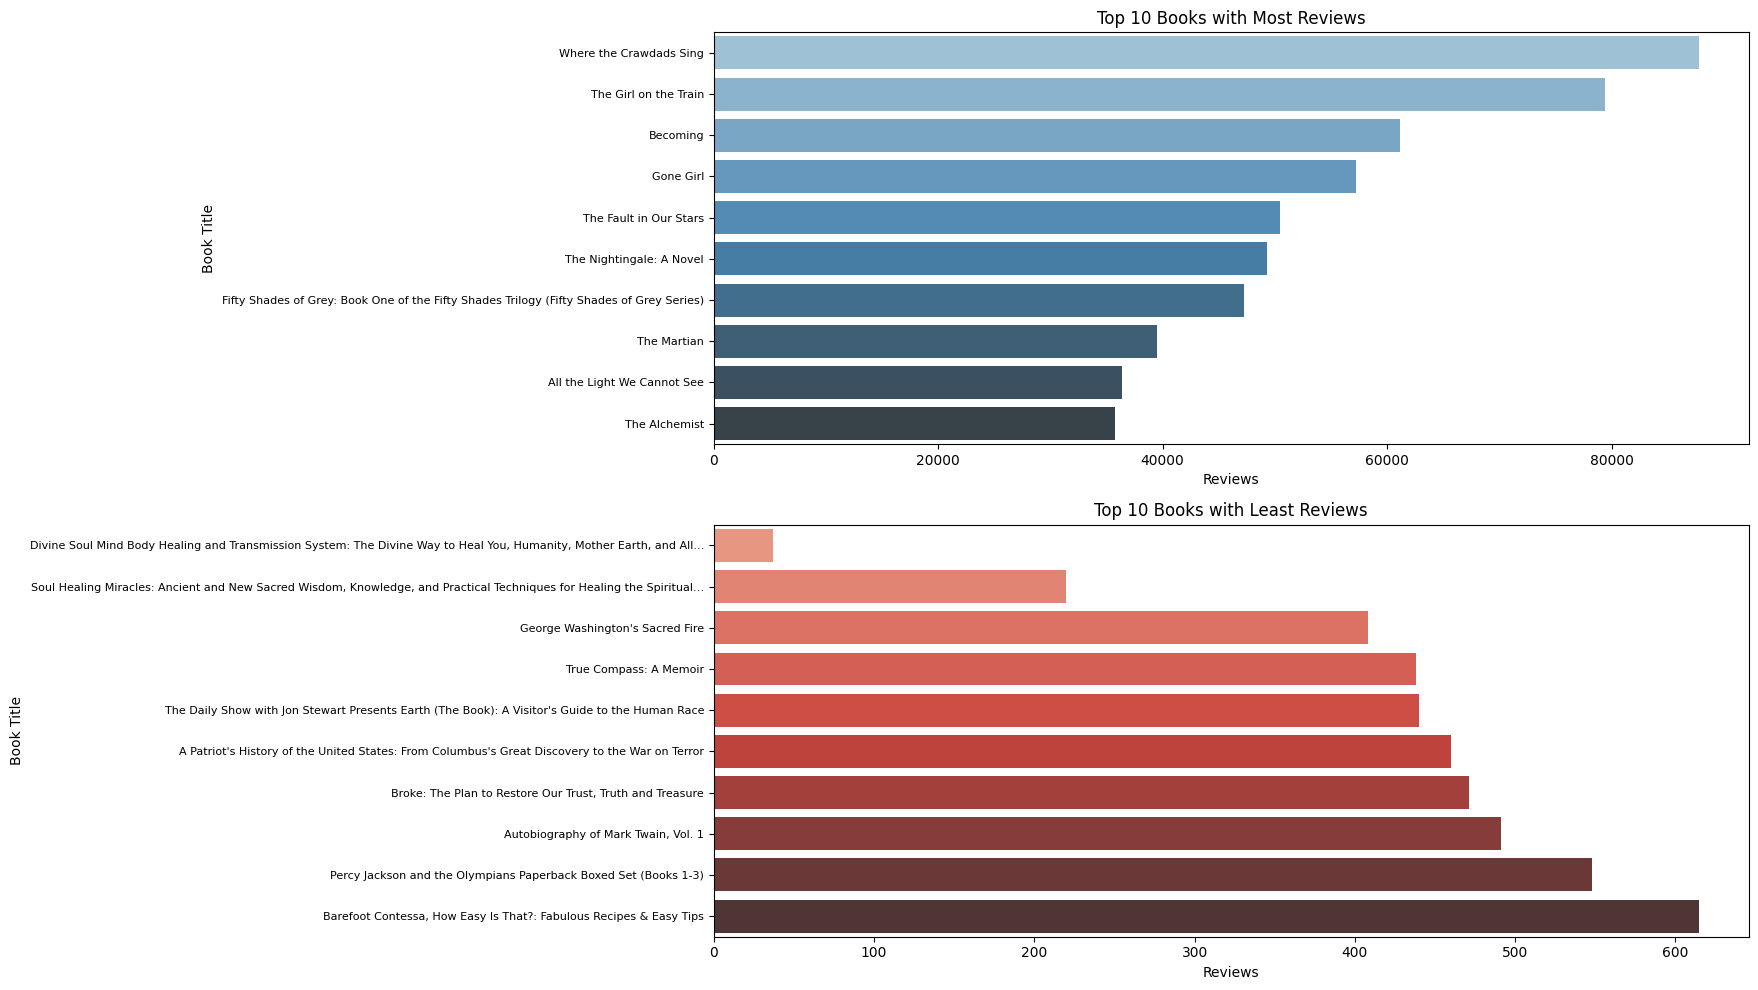

In [29]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with two subplots (vertical layout)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))  # Wider figure to fit text

# Top 10 books with most reviews

sns.barplot(
    x='Reviews',
    y='Name',
    data=df2.sort_values(by='Reviews', ascending=False).head(10),
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('Top 10 Books with Most Reviews')
axes[0].set_xlabel('Reviews')
axes[0].set_ylabel('Book Title')
axes[0].tick_params(axis='y', labelsize=8)  # Smaller font for long titles

# Top 10 books with least reviews

sns.barplot(
    x='Reviews',
    y='Name',
    data=df2.sort_values(by='Reviews', ascending=True).head(10),
    ax=axes[1],
    palette='Reds_d'
)
axes[1].set_title('Top 10 Books with Least Reviews')
axes[1].set_xlabel('Reviews')
axes[1].set_ylabel('Book Title')
axes[1].tick_params(axis='y', labelsize=8)  # Smaller font for long titles

# Adjust layout and add more margin on the left if needed

plt.tight_layout()
plt.subplots_adjust(left=0.25)  # Increase left margin
plt.show()


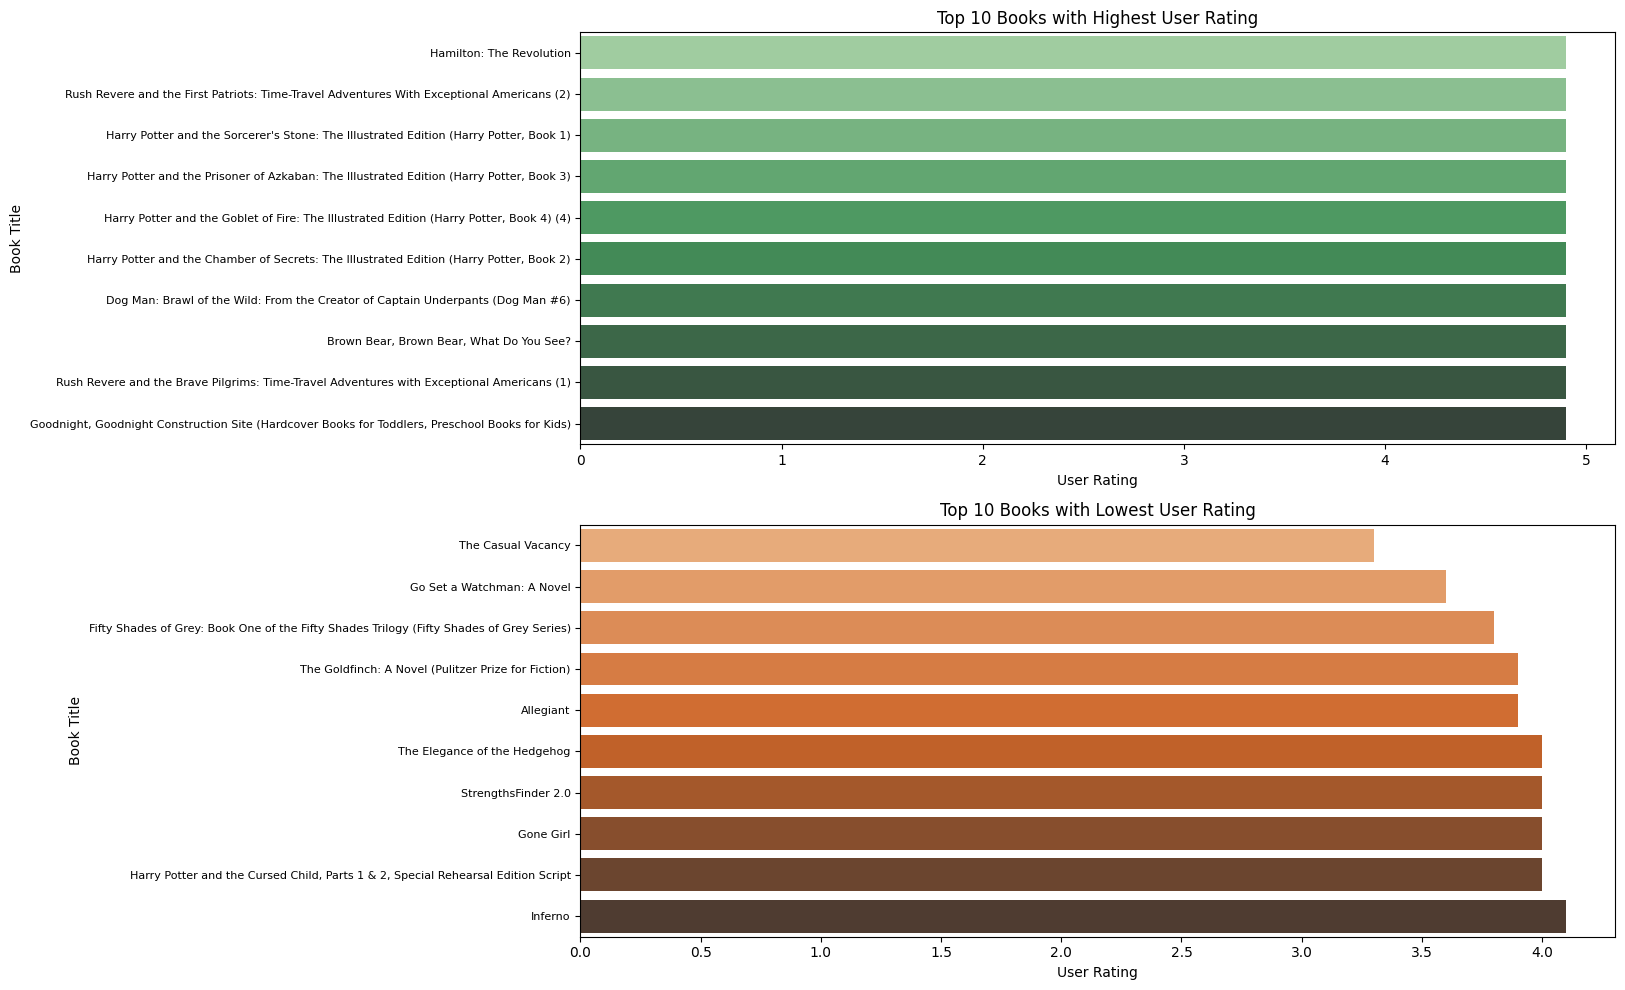

In [30]:
# Create figure with two subplots (vertical layout)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))  # Wider figure to fit long titles

# Top 10 books with highest user rating
sns.barplot(
    x='User_Rating',
    y='Name',
    data=df2.sort_values(by='User_Rating', ascending=False).head(10),
    ax=axes[0],
    palette='Greens_d'
)
axes[0].set_title('Top 10 Books with Highest User Rating')
axes[0].set_xlabel('User Rating')
axes[0].set_ylabel('Book Title')
axes[0].tick_params(axis='y', labelsize=8)  # Smaller font for long names

# Top 10 books with lowest user rating
sns.barplot(
    x='User_Rating',
    y='Name',
    data=df2.sort_values(by='User_Rating', ascending=True).head(10),
    ax=axes[1],
    palette='Oranges_d'
)
axes[1].set_title('Top 10 Books with Lowest User Rating')
axes[1].set_xlabel('User Rating')
axes[1].set_ylabel('Book Title')
axes[1].tick_params(axis='y', labelsize=8)

# Adjust layout and left margin for long titles
plt.tight_layout()
plt.subplots_adjust(left=0.25)
plt.show()

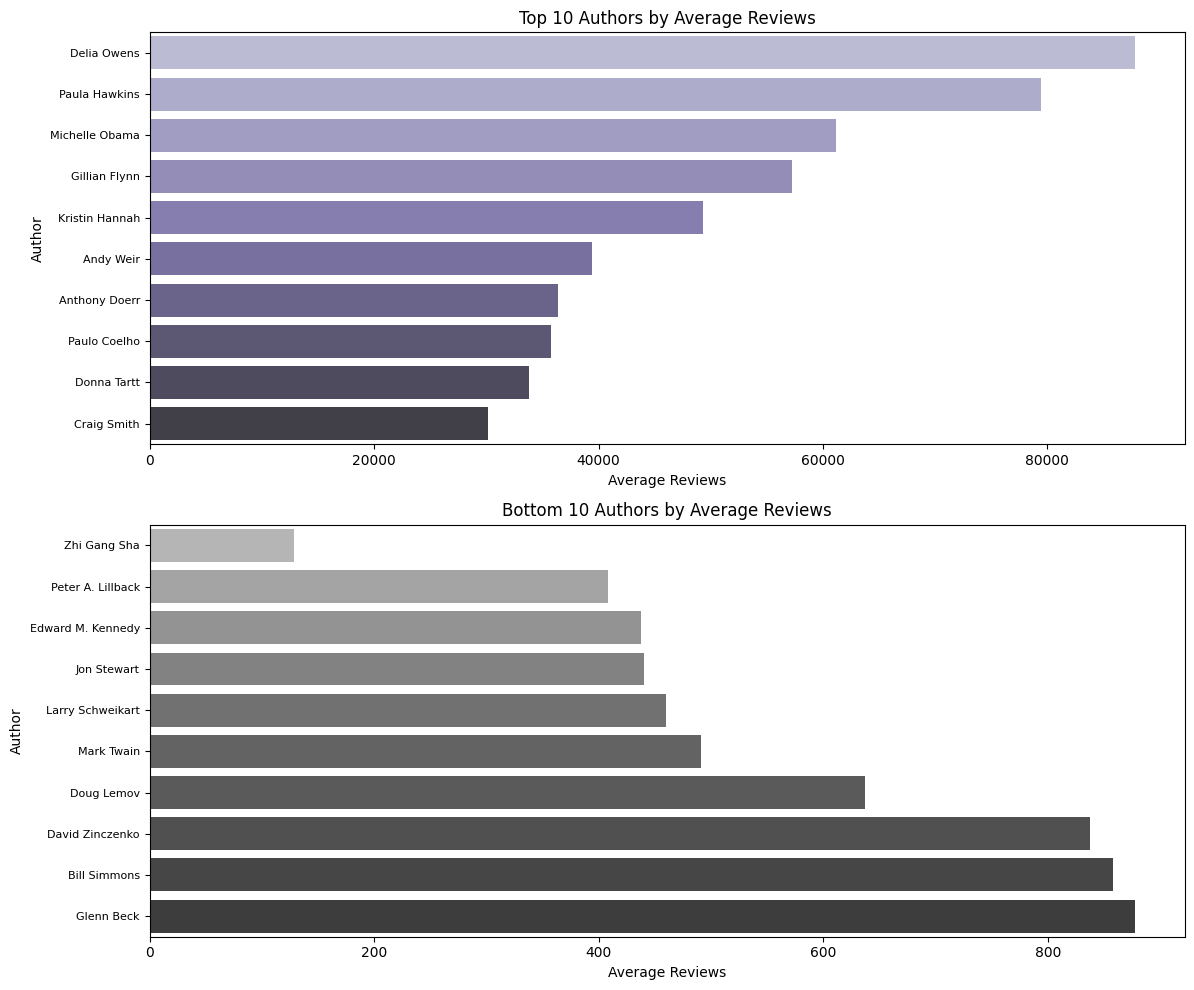

In [31]:
# Create figure with two vertical subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top 10 authors with highest average reviews
sns.barplot(
    x='Reviews',
    y='Author',
    data=df2.groupby('Author', as_index=False)['Reviews'].mean().sort_values(by='Reviews', ascending=False).head(10),
    ax=axes[0],
    palette='Purples_d'
)
axes[0].set_title('Top 10 Authors by Average Reviews')
axes[0].set_xlabel('Average Reviews')
axes[0].set_ylabel('Author')
axes[0].tick_params(axis='y', labelsize=8)

# Top 10 authors with lowest average reviews
sns.barplot(
    x='Reviews',
    y='Author',
    data=df2.groupby('Author', as_index=False)['Reviews'].mean().sort_values(by='Reviews', ascending=True).head(10),
    ax=axes[1],
    palette='Greys_d'
)
axes[1].set_title('Bottom 10 Authors by Average Reviews')
axes[1].set_xlabel('Average Reviews')
axes[1].set_ylabel('Author')
axes[1].tick_params(axis='y', labelsize=8)

# Adjust layout for spacing and long names
plt.tight_layout()
plt.subplots_adjust(left=0.25)
plt.show()

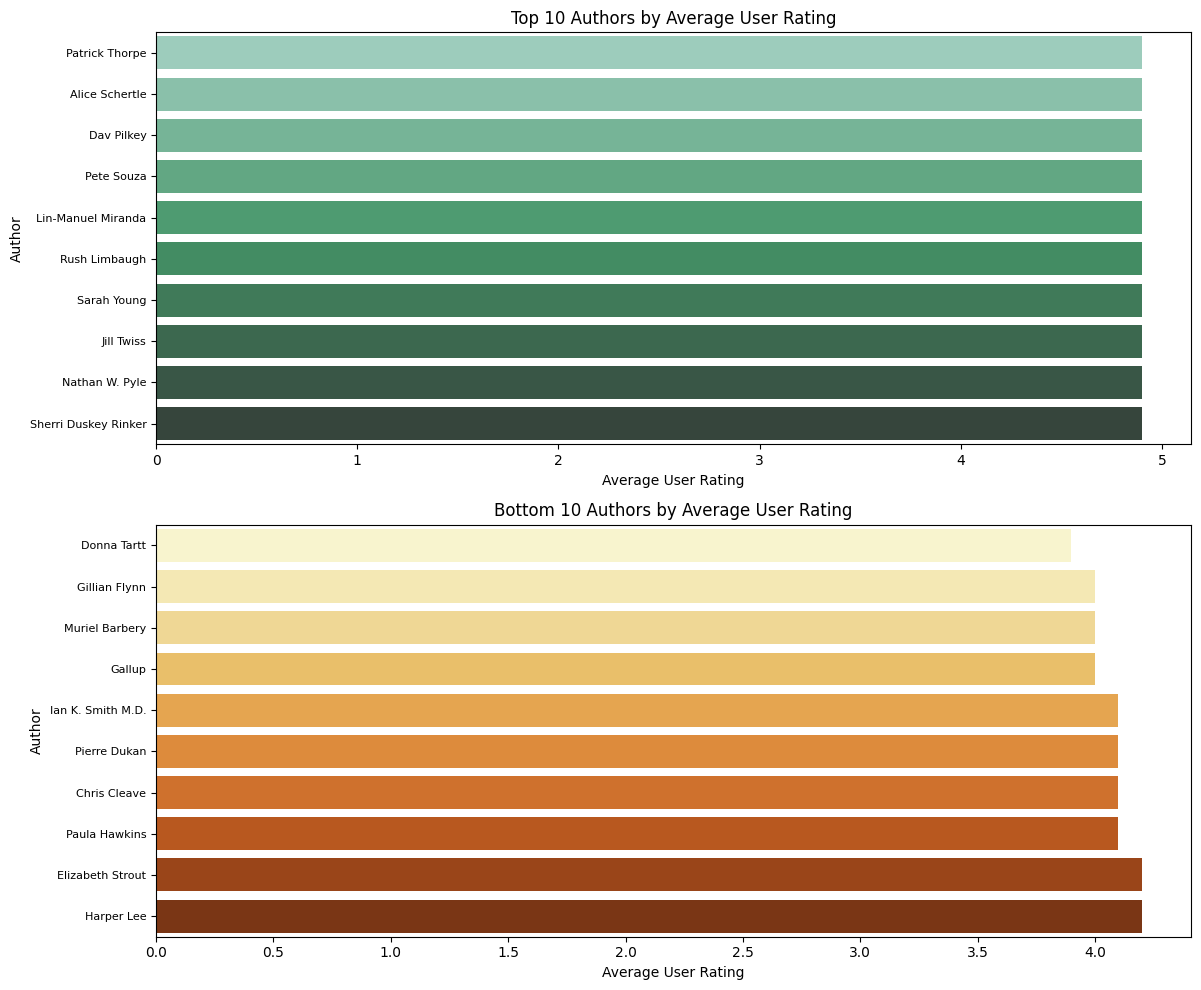

In [32]:
# Create figure with two vertical subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top 10 authors with highest average user rating
sns.barplot(
    x='User_Rating',
    y='Author',
    data=df2.groupby('Author', as_index=False)['User_Rating'].mean().sort_values(by='User_Rating', ascending=False).head(10),
    ax=axes[0],
    palette='BuGn_d'
)
axes[0].set_title('Top 10 Authors by Average User Rating')
axes[0].set_xlabel('Average User Rating')
axes[0].set_ylabel('Author')
axes[0].tick_params(axis='y', labelsize=8)

# Bottom 10 authors with lowest average user rating
sns.barplot(
    x='User_Rating',
    y='Author',
    data=df2.groupby('Author', as_index=False)['User_Rating'].mean().sort_values(by='User_Rating', ascending=True).head(10),
    ax=axes[1],
    palette='YlOrBr'
)
axes[1].set_title('Bottom 10 Authors by Average User Rating')
axes[1].set_xlabel('Average User Rating')
axes[1].set_ylabel('Author')
axes[1].tick_params(axis='y', labelsize=8)

# Adjust layout for spacing and long names
plt.tight_layout()
plt.subplots_adjust(left=0.25)
plt.show()

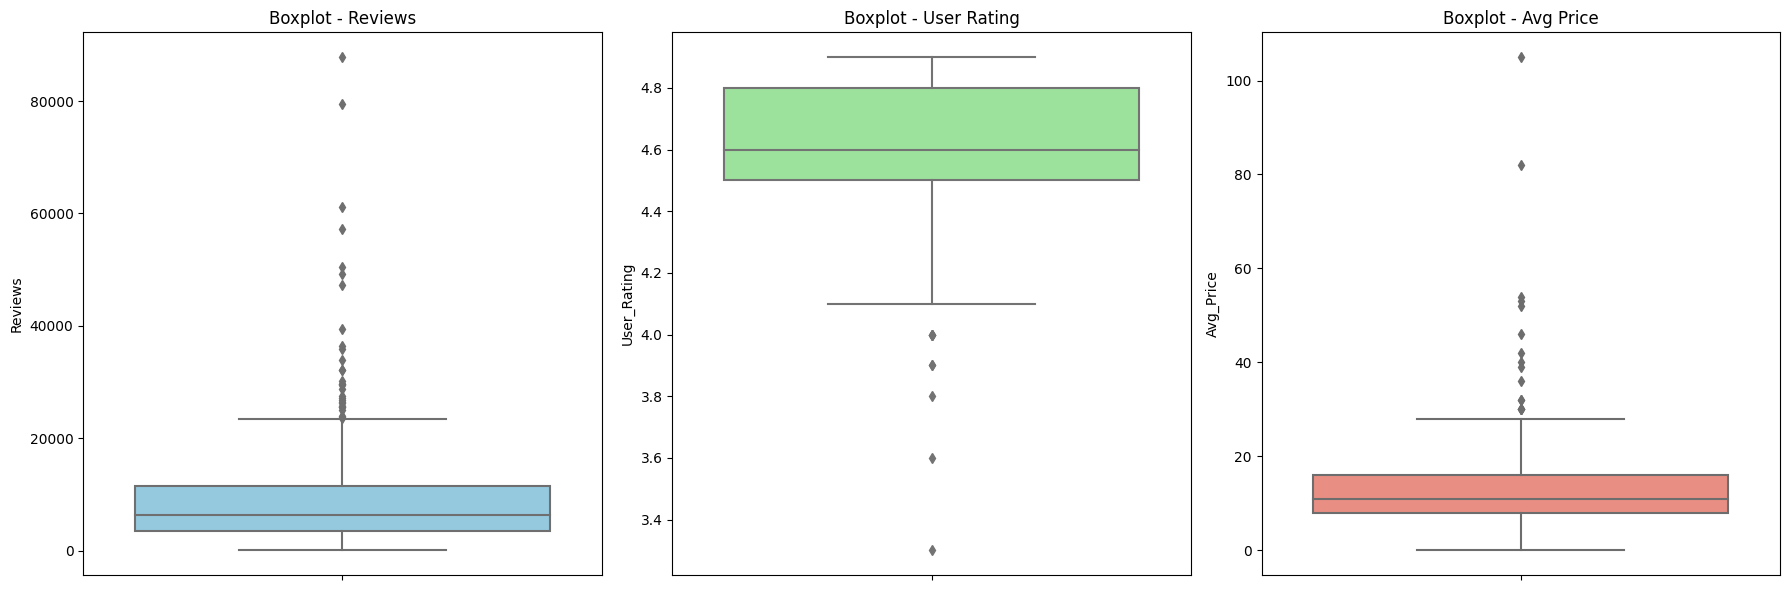

In [33]:
# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for Reviews
sns.boxplot(y='Reviews', data=df2, ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot - Reviews')

# Boxplot for User Rating
sns.boxplot(y='User_Rating', data=df2, ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot - User Rating')

# Boxplot for Average Price
sns.boxplot(y='Avg_Price', data=df2, ax=axes[2], color='salmon')
axes[2].set_title('Boxplot - Avg Price')

plt.tight_layout()
plt.show()

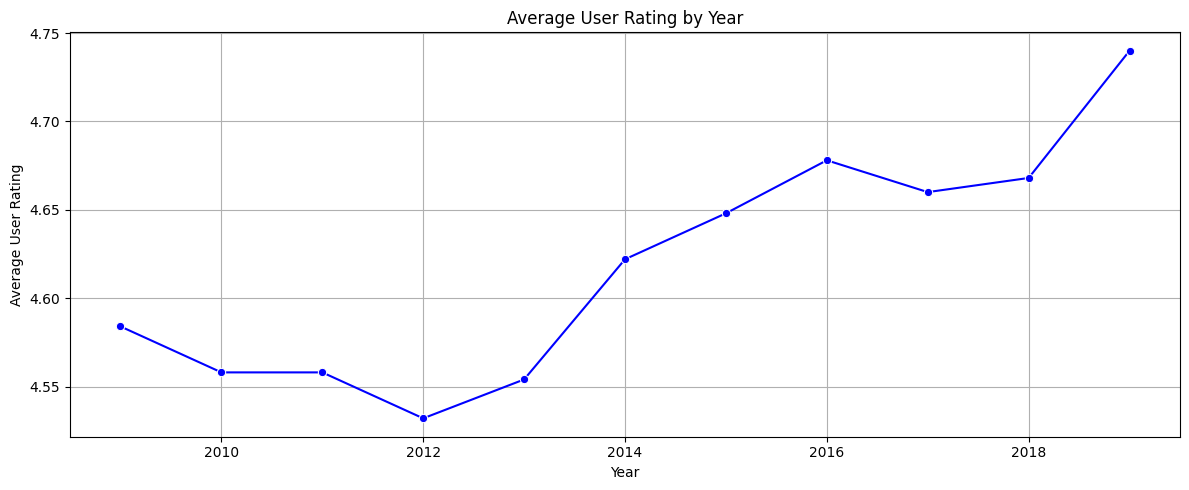

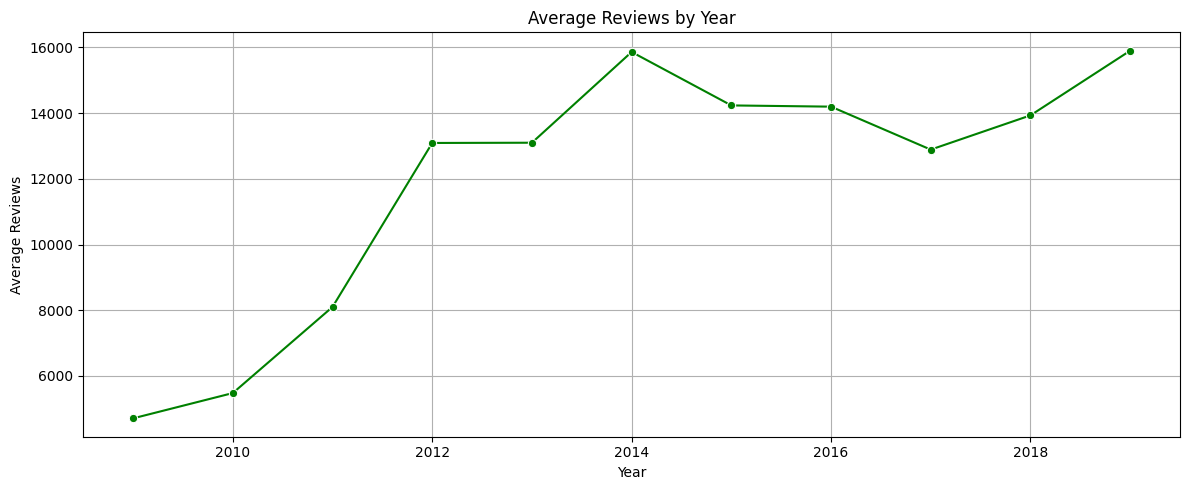

In [34]:
# For the warning

import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Calculate average Reviews and User Rating per year
yearly_avg = df.groupby('Year')[['Reviews', 'User Rating']].mean().reset_index()

# Plot average User Rating by year
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='User Rating', data=yearly_avg, marker='o', color='blue')
plt.title('Average User Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot average Reviews by year
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Reviews', data=yearly_avg, marker='o', color='green')
plt.title('Average Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Average Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

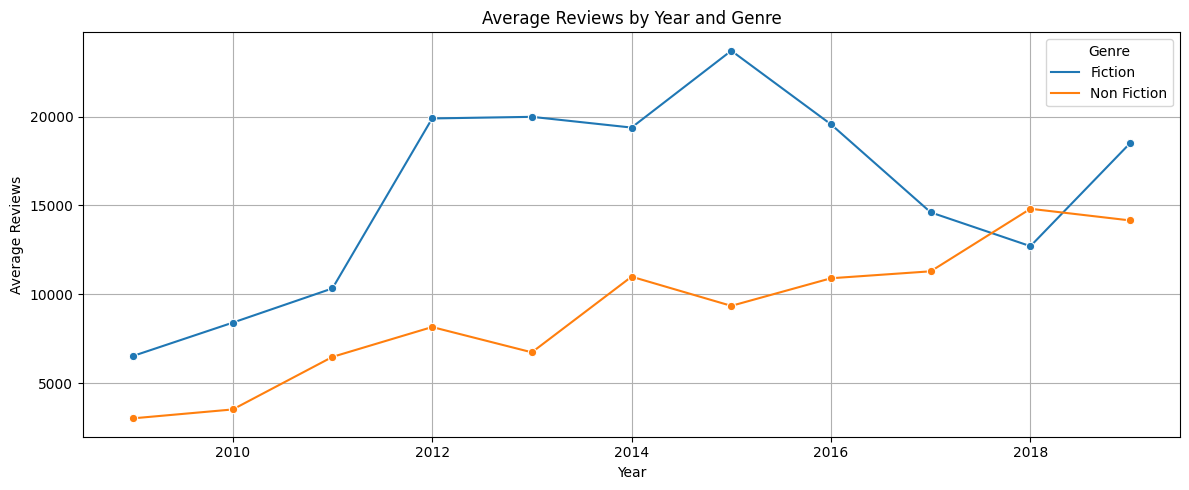

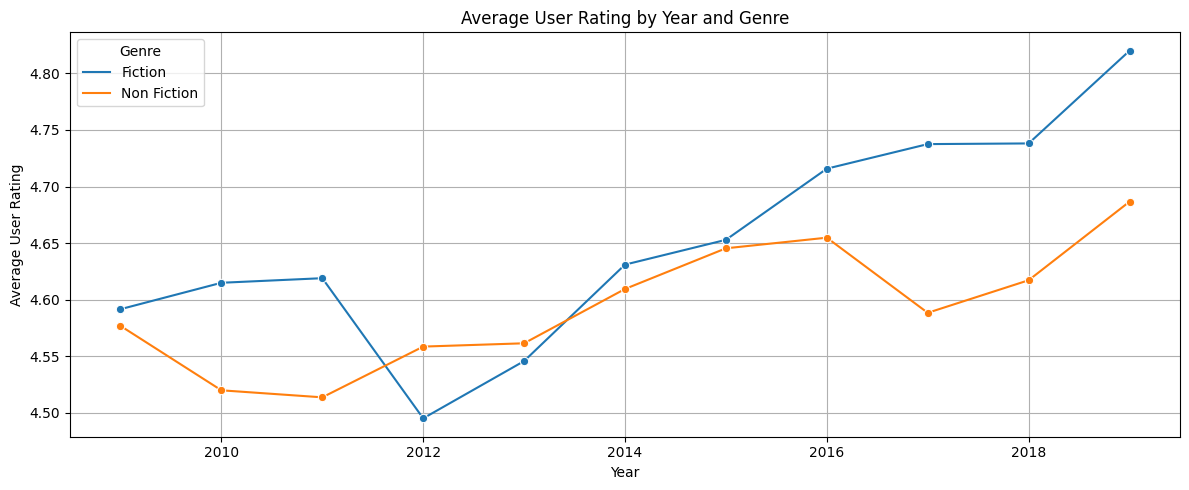

In [35]:
# For the warning

warnings.filterwarnings("ignore", message=".*get_group.*")

# Calculate average Reviews and User Rating per year and genre
yearly_genre_avg = df.groupby(['Year', 'Genre'])[['Reviews', 'User Rating']].mean().reset_index()

# Plot average Reviews by year and genre
plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly_genre_avg, x='Year', y='Reviews', hue='Genre', marker='o')
plt.title('Average Reviews by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Average Reviews')
plt.grid(True)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

# Plot average User Rating by year and genre
plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly_genre_avg, x='Year', y='User Rating', hue='Genre', marker='o')
plt.title('Average User Rating by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.grid(True)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

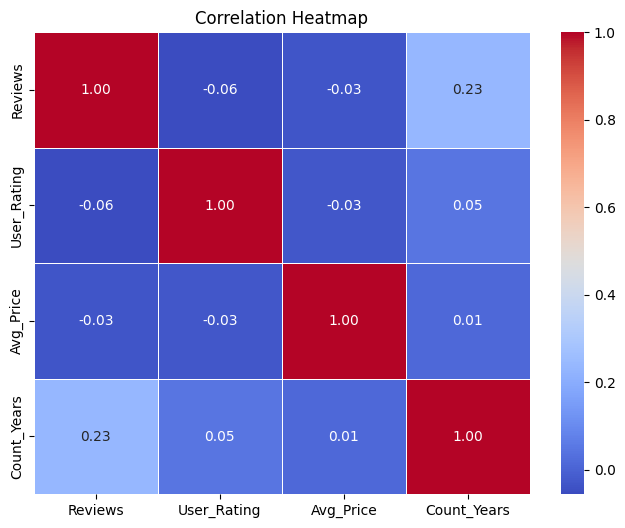

In [36]:
# Calculate correlation matrix

corr_matrix = df2[['Reviews', 'User_Rating', 'Avg_Price', 'Count_Years']].corr()

# Plot heatmap

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Dashboard
A dashboard is an essential tool to visualize and analyze bestseller book data effectively. It enables quick insights into key metrics such as top-rated books, sales trends over years, and genre distribution. By interactively filtering and exploring the data, users can identify patterns and make data-driven decisions effortlessly. This enhances the overall understanding of the dataset and supports reporting and presentation needs.

To begin working with the dashboard, export the prepared CSV files containing the cleaned and processed bestseller book data. These CSV files serve as the data source for Power BI, ensuring consistency and ease of updating the visualizations as new data becomes available.

In [37]:
# Export the data for power BI

df.to_csv('/kaggle/working/df1.csv', index=False)
df2.to_csv('/kaggle/working/df2.csv', index=False)

## Page 1: Bestseller Overview
This page provides a comprehensive high-level analysis of bestselling books, their ratings, genres, and trends over time. Users can filter the data by year, genre, and author to explore the evolution of bestseller counts per year and genre through a stacked column chart. Key performance indicators such as total number of books, average rating, average price, and total reviews are displayed prominently for quick insights. Additionally, a scatter or bubble chart illustrates the relationship between price, user rating, and popularity, while a dynamic table highlights the top 10 books based on ratings or reviews.
## Page 2: Interactive Exploration by Author and Genre
The second page enables users to perform a detailed examination of bestselling books by author and genre. Interactive filters allow selection by author, genre, and year, updating the visuals accordingly. A horizontal bar chart ranks authors by the number of bestseller titles, while a clustered column chart compares average ratings and reviews across genres. A detailed table provides granular data on individual books with cross-filtering capabilities. Enhanced interactivity features include synchronized slicers between pages, navigation buttons, author highlighting on selection, and custom tooltips for deeper insights.
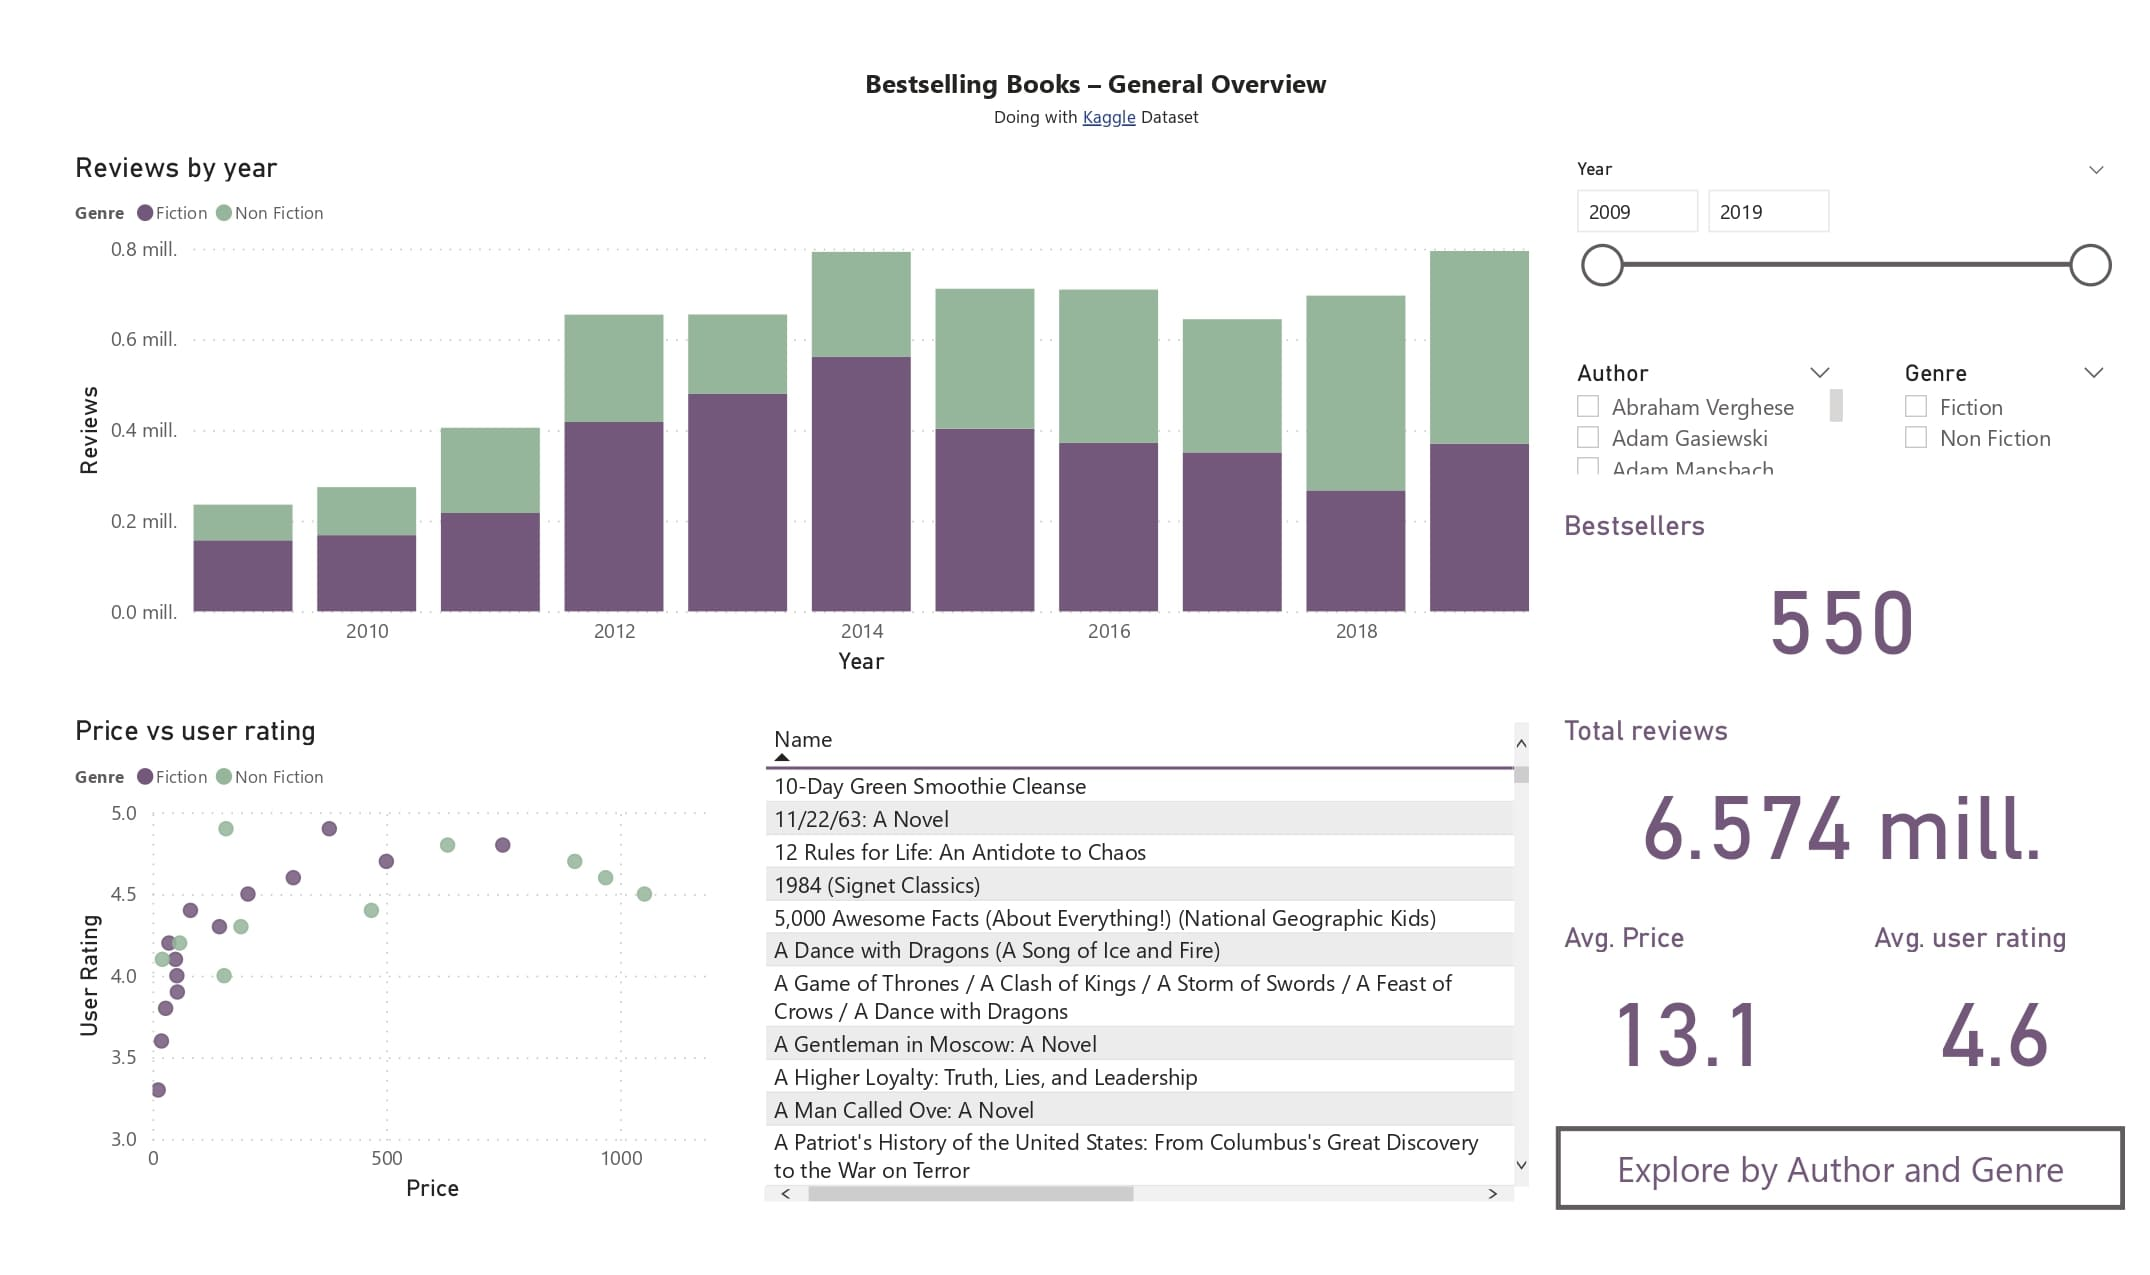
The complete Power BI report can be found at the following link:
[Download Power BI Report](https://drive.google.com/uc?export=view&id=1R5IcoJLixbv9cAYCtj3S2pif9-2GDPPP)
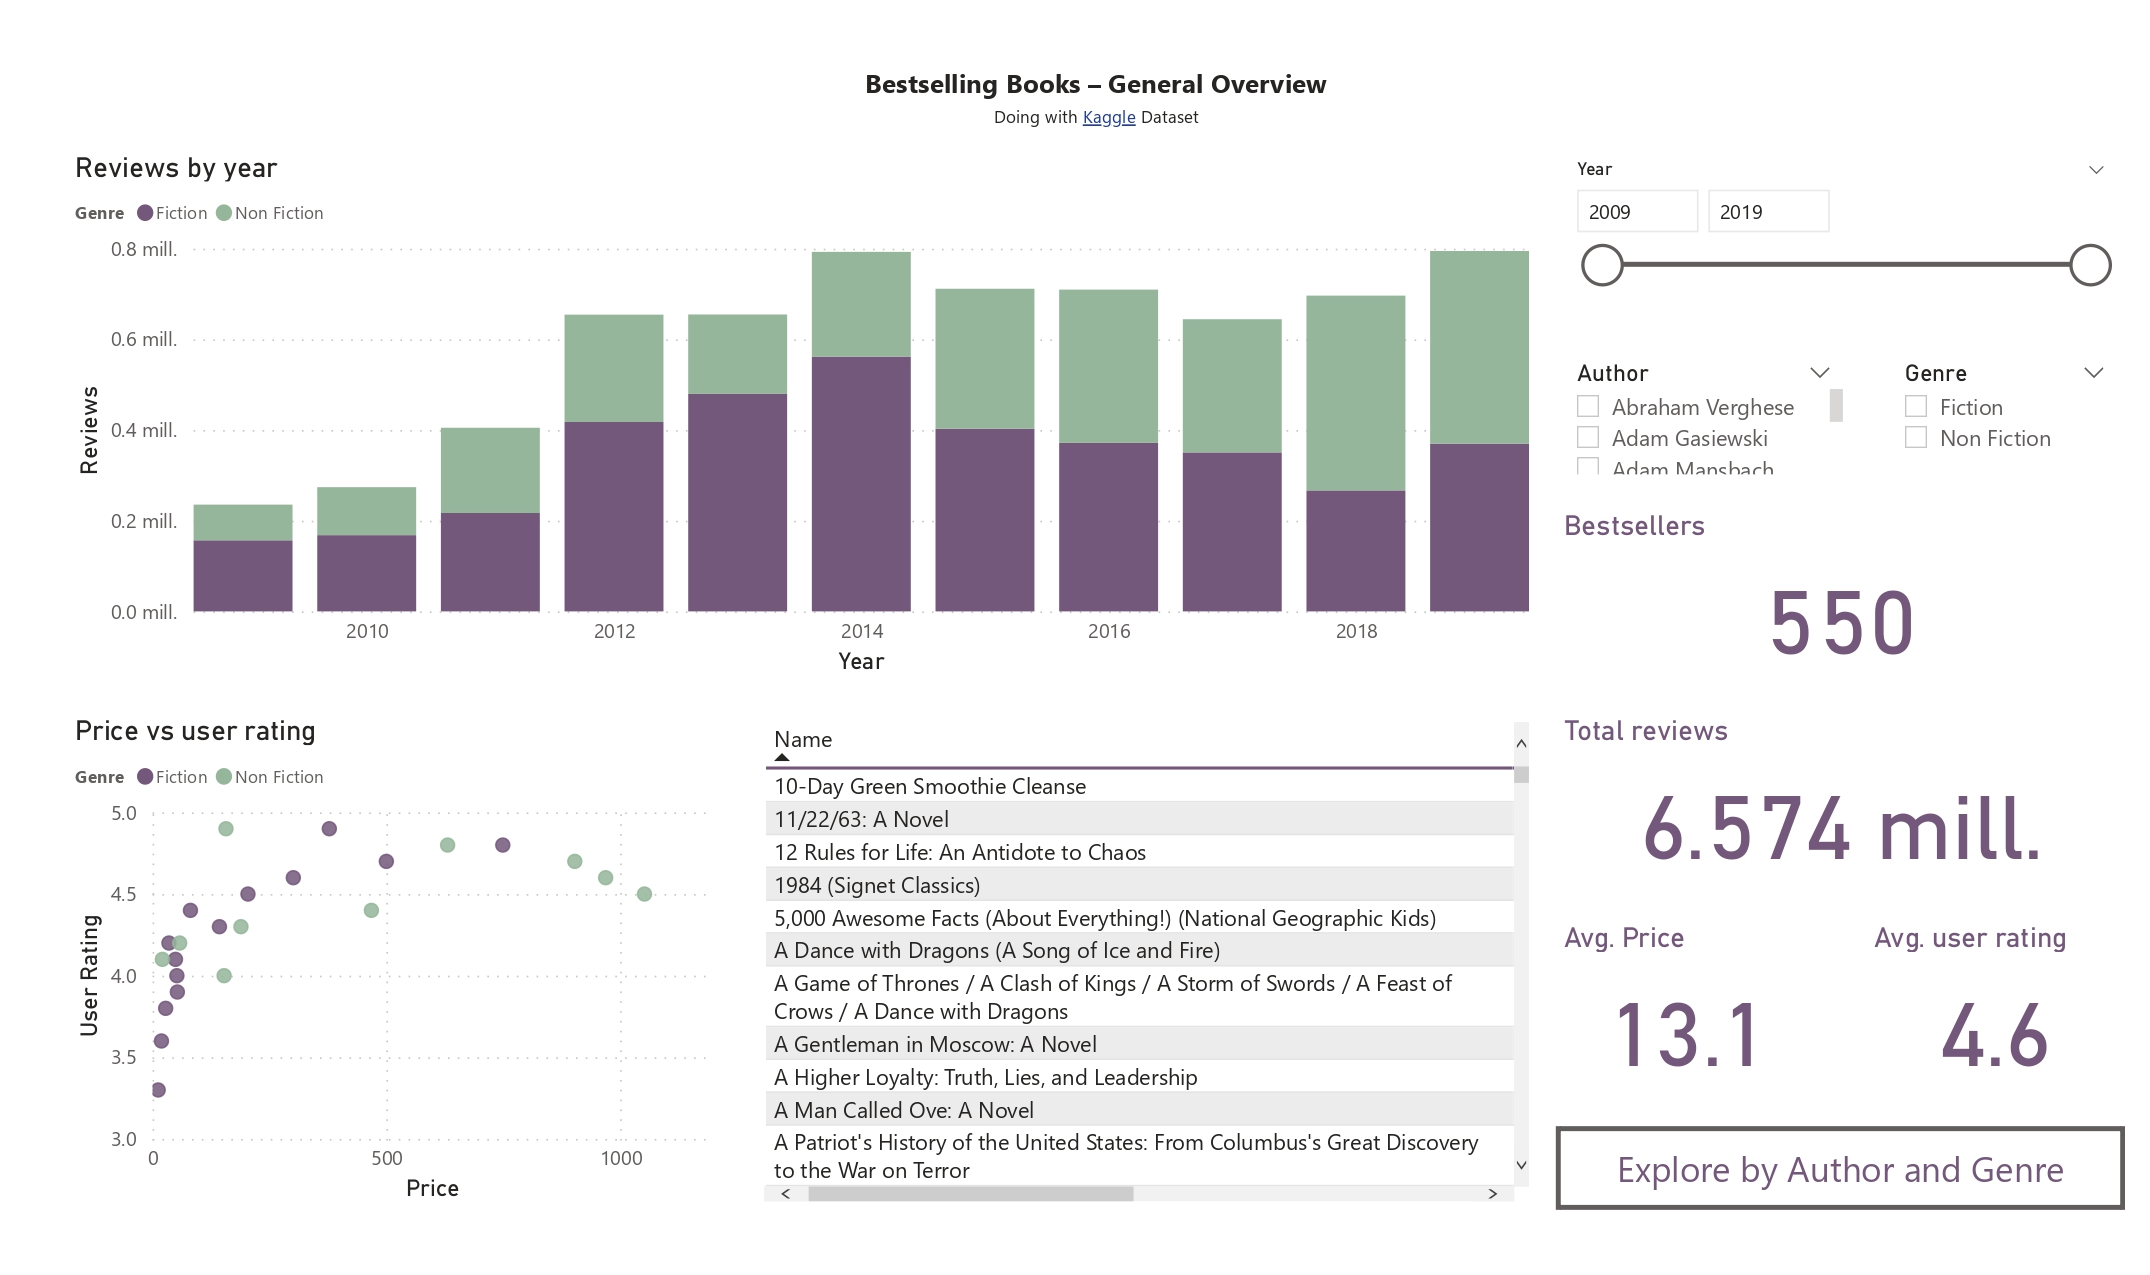